# Интернет магазин "Стримчик".  Исследование успешности игр.

#  Описание проекта.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. <br>
Ход работы :
1. Ознакомление с таблицей. Получение общей информации.
2. Предобработка данных: <br>
1) Заменить названия столбцов.<br>
2) Преобразуйте данные в нужные типы.<br>
3) Обработать пропуски при необходимости.<br>
3. Исследовательский анализ данных: <br>
1) Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды.<br>
2) Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построем распределение по годам. Проверим за какой характерный срок появляются новые и исчезают старые платформы?<br>
3)  Возьмем данные за актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.<br>
4) Проверим какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.
5) Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам.<br>
6) Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.<br>
4. Составление портрета пользователя каждого региона (NA, EU, JP): <br>
1) Самые популярные платформы (топ-5).<br>
2) Самые популярные жанры (топ-5).<br>
3) Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br>
5. Проверка гипотез :<br>
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br>
2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Общий вывод.

Значение столбцов таблицы:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Ознакомление с таблицей

In [1]:
# импортируем все необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# прочитаем датасет и сохраним в переменную
data = pd.read_csv('/%%%%%%.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# посмторим на общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В ходе первичного знакомства с данными было однаруженно , что :
1. Названия столбцов нужно привести к нижнему регистру.
2. Нужно будет поменять тип данных для некоторых столбцов.
3. В таблице есть пропуски.

## Предобработка данных

In [4]:
# проверим наличие явных дубликатов. их нет
data.duplicated().sum()

0

In [5]:
# привидем название столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [6]:
# проверим результат
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
# привидем названия платформ, названия игр, жанр и рейтинг к нижнему регистру
for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()

In [8]:
# проверим результат. все хорошо
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# проверим наличие неявных дубликатов
data.duplicated(subset=['name', 'platform', 'year_of_release','genre']).sum()

2

In [10]:
# удалим неявные дуюликаты
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release','genre'])

In [11]:
# проверим результат. все в порядке 
data.duplicated(subset=['name', 'platform', 'year_of_release','genre']).sum()

0

In [12]:
# проверим в каких столбцах есть пропуски
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Пропуски в стобцах с названием игр, годом выхода и жанром придется удалить т.к. нет возможности заполнить их агрегированными значениями. Для столбцов с оценками критиков и пользователей оставим пропуски как есть , будет неправильно заполнять их агрегированными значениями. Пропуски в столбце рейтинг заполним значением 'unknown' т.к. это категориальная оценка.

In [15]:
# посмотрим на строки с пропусками в данных столбцах
data.loc[data[['name','year_of_release','genre']].isna().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
# удалим строки с пропусками в названии игры, год выпуска и жанр
data = data.dropna(subset=['name','year_of_release','genre'])

In [17]:
# заполним пропуски в рейтиге значением 'unknown'
data['rating'] = data['rating'].fillna('unknown')

In [18]:
# посмотрим на уникальные значения в столбце с оценкой играков
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
# встречается значение 'tbd' , скорее всего это 'NaN' , т.к. тип данных "object". заменим это значение на 'NaN'
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [20]:
# проверим результат. все в порядке
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [21]:
# проверим результат работы с пропусками. все нежелательные пропуски исправлены
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [22]:
# поменяем формат для столбца с годом и оценкой пользователей
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

In [23]:
# добавим столбец с общей выручкой
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод по предобработке данных.
В ходе предобработке данных были выполнены следующие шаги :
1. Названия столбцов были приведены к нижнему регистру, а также название игр и платформ, жанр и рейтинг.
2. Были удалены неявные дубликаты в столбцах с названием игр и платформ, жанр и рейтинг.
2. Были удалены строки с пропусками в названии игры, год выпуска и жанр.
3. Заполнили пропуски в рейтиге значением 'unknown'.
4. В столбце с оценками пользователей значения 'tbd' были заменены на 'NaN'.
5. Столбцы с оценкоами пользователей и годом выпуска игры были приведены к числовому формату.
6. Был добавлен столбец с суммарной выручкой по миру для каждой игры.
7. Пропуски с оценками критиков и пользователей оставим как есть , будет неправильно заполнять их агрегированными значениями.
<br>
Причинами появления пропусков в данных могут быть: неверный ввод данных, сокрытие информации, повреждение файла данных при сохранении, технические проблемы.


## Исследовательский анализ.

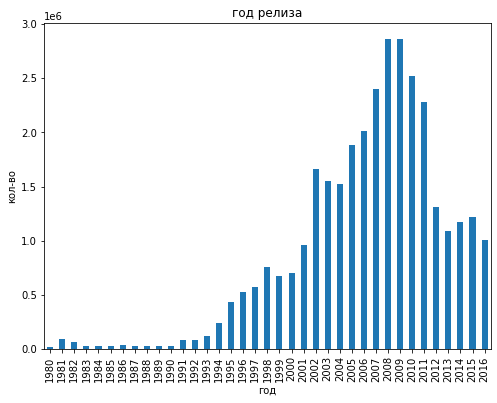

In [25]:
# график с кол-вом выпущенных игр по годам
data.groupby('year_of_release')['year_of_release'].sum().plot.bar(figsize=(8,6) , xlabel='год' , ylabel='кол-во')
plt.title('год релиза')
plt.show()

На графике видно , что с 2001г выпуск игр значительно вырос.После 2011г начался резкий спад.

Выберем платформы с наибольшими суммарными продажами и построем распределение по годам.

In [26]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(20)

platform
ps2     1233.56
x360     961.24
ps3      931.33
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
2600      86.48
wiiu      82.19
Name: total_sales, dtype: float64

Платфрмы "PS2","X360","PS3","Wii","DS","PS4","GBA"  являются лидерами по суммарным продажам по годам. Посторим график появления и исчезновения платформ.

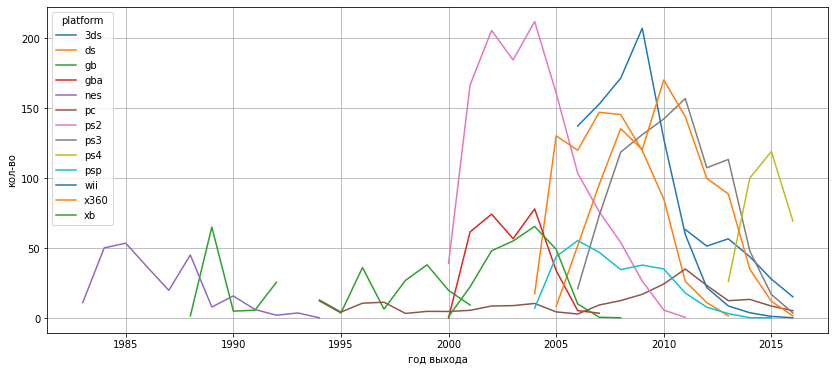

In [27]:
# график появления и исчезновения платформ
data.query('platform ==  ["ps2","x360","ps3","wii","ds","ps4","gba","psp","3ds","pc","gb","xb","nes"]').pivot_table(index='year_of_release',
                        columns = 'platform',
                        values='total_sales',
                        aggfunc='sum').plot(grid=True,xlabel='год выхода',ylabel='кол-во' , figsize=(14, 6))
plt.show()

Можно сказать , что новые платформы появляются примерно каждые 5-10 лет , примерно столько же они остаются актуальными.

Для дальнейшего исследования возьмем данные за 2014, 2015 и 2016 года т.к. нам нужно сделать прогноз на 2017г. Данные за этот период будут более актуальными.

In [29]:
# сделаем новую таблицу с выходом игр после 2014
data_filter = data.query("2014 <= year_of_release <= 2016")

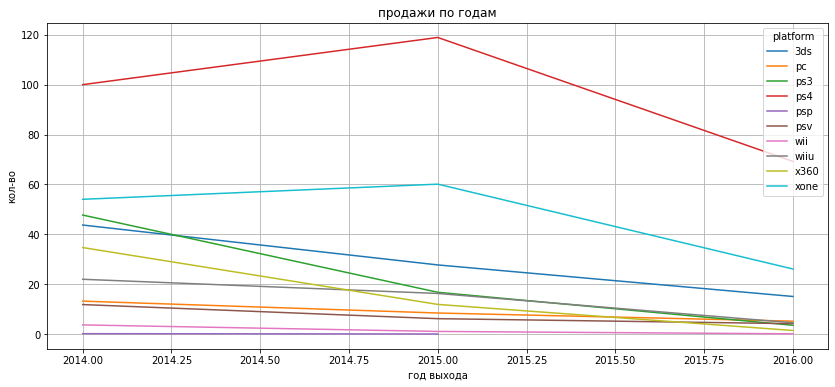

In [30]:
# график расспределения продаж по годам
data_filter.pivot_table(index='year_of_release',
                        columns = 'platform',
                        values='total_sales',
                        aggfunc='sum').plot(grid=True,xlabel='год выхода',ylabel='кол-во' , figsize=(14, 6))
plt.title('продажи по годам')

plt.show()

На графике видно, что продажи по платформам падают, наиболее актуальными являются PS4 и XOne. 3ds менее актульна , но все же еще представляет коммерчиский интерес.Так же возьмем для исследования рс т.к. компьютер это постоянно обновляемая платформа, которая никогда не теряет актуальности.

In [31]:
# таблица с данными за 2014,2015 и 2016 года для плтаформ "ps4","xone","3ds","pc"
data_filter_final = data_filter.query('platform == ["ps4","xone","3ds","pc"]')

In [32]:
data_filter_final.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
pc,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
ps4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
xone,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


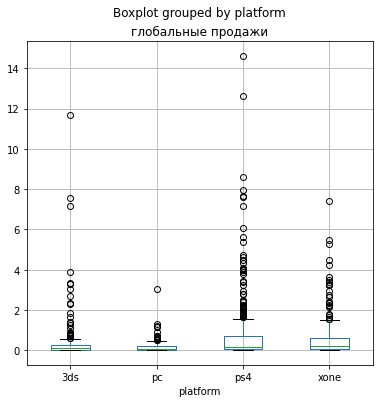

In [33]:
# "ящик с усами" по прадажам за 2015 2016 года для РС4 ,Xbox one , pc u 3ds
data_filter_final.boxplot(by='platform',column='total_sales', figsize=(6,6))
plt.title('глобальные продажи')
plt.show()

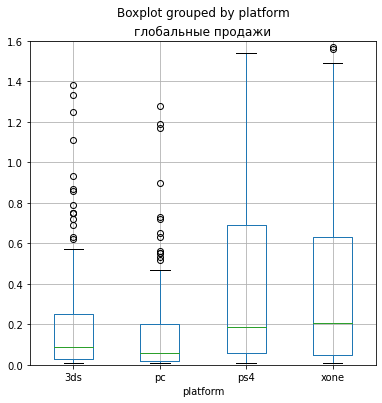

In [34]:
# детальный "ящик с усами" по прадажам за 2015 2016 года для РС4 ,Xbox one , pc u 3ds
data_filter_final.boxplot(by='platform',column='total_sales', figsize=(6,6))
plt.title('глобальные продажи')
plt.ylim(0,1.6)
plt.show()

У РС4 выше продажи за этот период а также больше выбросов , что говорит о большем кол-ве игр , которые "выстрелили".<br>
Поэтому возьмем данные для РС4 , чтобы посмотрить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [35]:
# переменная с данными за 2015 и 2016 года для РС4
data_ps4 = data_filter_final[data_filter_final['platform'] == 'ps4']

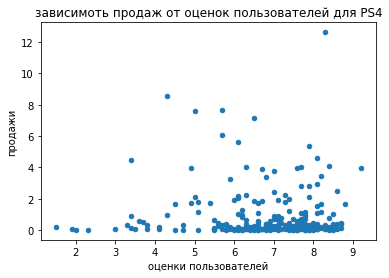

In [36]:
# график зависимоти продаж от оценок пользователей 
data_ps4.plot(x='user_score',
                                     y='total_sales', kind='scatter',
                                     xlabel='оценки пользователей',ylabel='продажи')
plt.title('зависимоть продаж от оценок пользователей для PS4')
plt.show()

In [37]:
# корреляция между оценками пользователей и продажами для PS4
data_ps4['user_score'].corr(data_ps4['total_sales'])

-0.040131589472697356

Видим, что зависимость между оценками пользователей и продажами очень слабо выраженна.

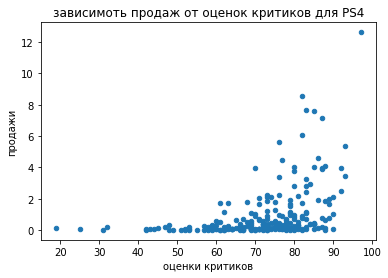

In [38]:
# график зависимоти продаж от оценок критиков
data_ps4.plot(x='critic_score',
                                     y='total_sales', kind='scatter',
                                     xlabel='оценки критиков',ylabel='продажи')
plt.title('зависимоть продаж от оценок критиков для PS4')
plt.show()

In [39]:
# корреляция между оценками пользователей и продажами для PS4
data_ps4['critic_score'].corr(data_ps4['total_sales'])

0.40266141068104083

Очевидно , что зависимость между продажами и оценкой критиков выше чем между продажами и оценкой пользователей , но все равно зависимомть достаточно слабо выраженна.

В целом мы видим , что есть зависимоть между оценками пользователей\критиков и продажами , но эта зависимость не ярко выражена. 

In [40]:
data_filter.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
pc,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
ps3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
ps4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
psp,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
psv,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
wiiu,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
x360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


In [41]:
# корреляция между оценками пользователей и продажами для всех платформ
data_filter['user_score'].corr(data_filter['total_sales'])

-0.013070305002484585

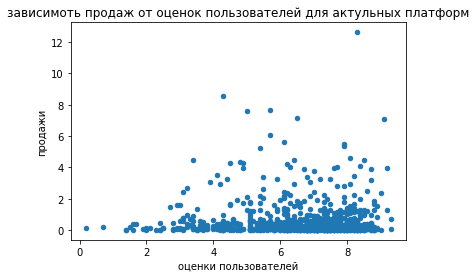

In [42]:
# график зависимоти продаж от оценок пользователей 
data_filter.plot(x='user_score',
                                     y='total_sales', kind='scatter',
                                     xlabel='оценки пользователей',ylabel='продажи')
plt.title('зависимоть продаж от оценок пользователей для актульных платформ')
plt.show()

In [43]:
# корреляция между оценками пользователей и продажами для всех платформ
data_filter['critic_score'].corr(data_filter['total_sales'])

0.328105086966363

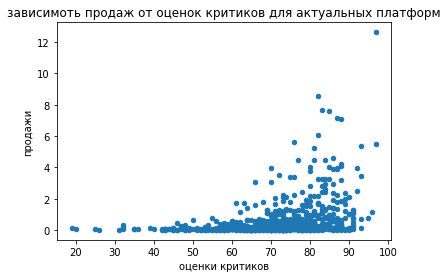

In [44]:
# график зависимоти продаж от оценок критиков
data_filter.plot(x='critic_score',
                                     y='total_sales', kind='scatter',
                                     xlabel='оценки критиков',ylabel='продажи')
plt.title('зависимоть продаж от оценок критиков для актуальных платформ')
plt.show()

In [45]:
print('Корреляция между оценками пользователей и продажами для всех платформ :',data_filter['user_score'].corr(data_filter['total_sales']))
print('Корреляция между оценками пользователей и продажами для PS4 :',data_ps4['user_score'].corr(data_ps4['total_sales']))
print('Корреляция между оценками критиков и продажами для всех платформ :',data_filter['critic_score'].corr(data_filter['total_sales']))
print('Корреляция между оценками критиков и продажами для PS4 :',data_ps4['critic_score'].corr(data_ps4['total_sales']))

Корреляция между оценками пользователей и продажами для всех платформ : -0.013070305002484585
Корреляция между оценками пользователей и продажами для PS4 : -0.040131589472697356
Корреляция между оценками критиков и продажами для всех платформ : 0.328105086966363
Корреляция между оценками критиков и продажами для PS4 : 0.40266141068104083


В целом, зависимость между оценками критиков\пользователей и продажами для РС4 и другими платформами похожа. Не ярко выражена.

Посмотрим на общее распределение игр по жанрам.

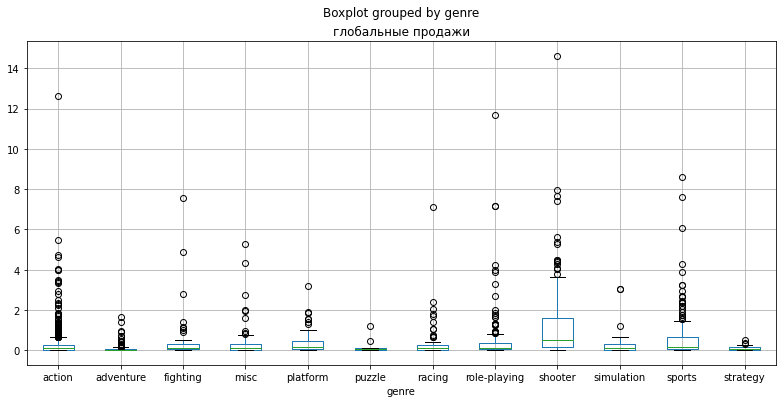

In [46]:
# "ящик с усами" для продаж по жанрам 
data_filter.boxplot(by='genre',column='total_sales', figsize=(13,6))
plt.title('глобальные продажи')
plt.show()

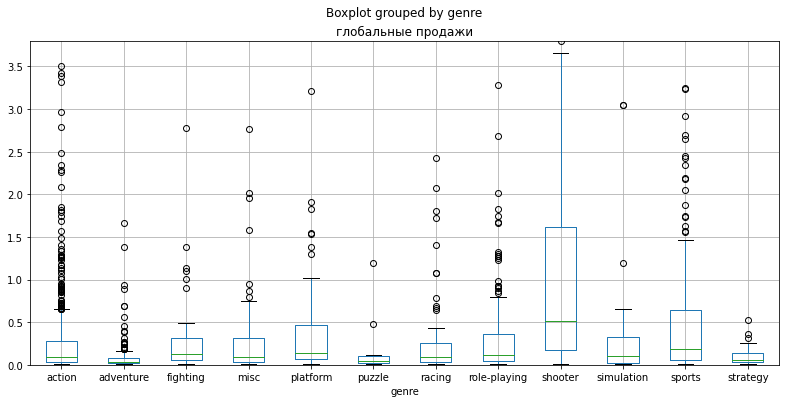

In [47]:
# "ящик с усами" для продаж по жанрам 
data_filter.boxplot(by='genre',column='total_sales', figsize=(13,6))
plt.title('глобальные продажи')
plt.ylim(0,3.8)
plt.show()

На диаграмме размаха мы видим, что жанр "Shooter" имеет самае высокие выбросы. Это говорит о большом кол-ве игр, которые имели очень высокие продажи. Так же у этого жанра самые высокие медиальные значения, из этого следаует , что на дестанции этот жанр имеет более высокие продажи. Стоит выделить жанры "Sports" и "Platform". Оба жанра имеют хорошие медиальные значения и выбросы, но в жанре "Sports" их больше. Так же обращает на себя внимание жанр "Action", его медиальные значения не так высоки, но очень много выбросов.  

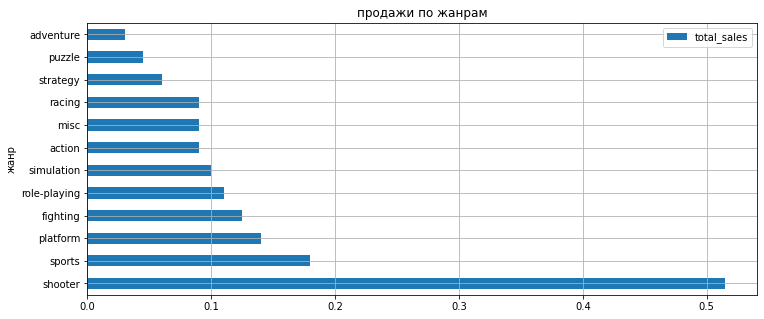

In [48]:
data_filter.pivot_table(index='genre',
                 values='total_sales',
                 aggfunc='median').sort_values(by='total_sales',
                                               ascending=False).plot.barh(grid=True, 
                                                                         figsize=(12, 5),
                                                                         xlabel='жанр',
                                                                         ylabel='продажи', title='продажи по жанрам')
xlabel='Жанр'
plt.show()

Исходя из графика можно сказать, что:

Топ 5 жанров :
1. Shooter
2. Sports
3. Platform
4. Fighting
5. Role-Playing

5 самых не популярных :
1. Adventure
2. Puzzle
3. Strategy
4. Racing
5. Misc

### Вывод по исследовательскому анализу.
1. С 2001г выпуск игр значительно вырос.После 2011г начался резкий спад.
2. Платфрмы "PS2","X360","PS3","Wii","DS","PS4","GBA" являются лидерами по суммарным продажам по годам.
3. Можно сказать , что новые платформы появляются примерно каждые 5-10 лет , примерно столько же они остаются актуальными.
4. Для исследования взяли данные за 2014,2015 и 2016 года т.к. нам нужно сделать прогноз на 2017г. Данные за этот период будут более актуальными. Так же самыми перспективными являются платформы РС4 и Xbox One, менее перспективные ,но все еще актуальные - PC и 3DS.
5. В целом, зависимость между оценками критиков\пользователей и продажами для РС4 и другими платформами похожа. Не ярко выражена.
6. Топ 5 жанров : <br>

1) Shooter<br>
2) Sports<br>
3) Platform<br>
4) Fighting<br>
5) Role-Playing<br>
<br>
5 самых не популярных :<br>

1) Adventure<br>
2) Puzzle<br>
3) Strategy<br>
4) Racing<br>
5) Misc<br>
<br>
Диаграмме размаха показала, что жанр "Shooter" имеет самае высокие выбросы. Это говорит о большом кол-ве игр, которые имели очень высокие продажи. Так же у этого жанра самые высокие медиальные значения, из этого следаует , что на дестанции этот жанр имеет более высокие продажи. Стоит выделить жанры "Sports" и "Platform". Оба жанра имеют хорошие медиальные значения и выбросы, но в жанре "Sports" их больше. Так же обращает на себя внимание жанр "Action", его медиальные значения не так высоки, но очень много выбросов.

##  Составим портрет пользователя каждого региона

### Самые популярные платформы в Северной Америке, Европе и Японии.

In [49]:
# самые популярные платформы в Северной Америке
na_users_platform = data_filter.pivot_table(index='platform',
                                  values='na_sales',
                                  aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na_users_platform['%'] = (na_users_platform['na_sales'] / na_users_platform['na_sales'].sum() *100).round(2)
na_users_platform

,na_sales,%
platform,,
ps4,98.61,39.00
xone,81.27,32.14
x360,28.30,11.19
3ds,22.64,8.95
ps3,22.05,8.72


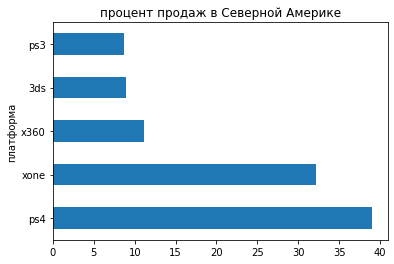

In [50]:
na_users_platform['%'].sort_values(ascending=False).plot.barh(xlabel='платформа',ylabel='процент продаж')
plt.title('процент продаж в Северной Америке')
plt.show()

Видим, что на первом месте "РС4", далее идет Xbox One. Остальные платформы представленны незначительно.

In [51]:
# самые популярные платформы в Европе
eu_users_platform = data_filter.pivot_table(index='platform',
                                  values='eu_sales',
                                  aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_users_platform['%'] = (eu_users_platform['eu_sales'] / eu_users_platform['eu_sales'].sum() *100).round(2)
eu_users_platform

,eu_sales,%
platform,,
ps4,130.04,55.12
xone,46.25,19.60
ps3,25.54,10.83
pc,17.97,7.62
3ds,16.12,6.83


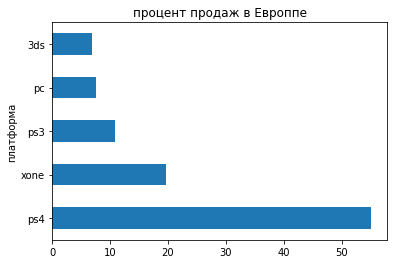

In [52]:
eu_users_platform['%'].sort_values(ascending=False).plot.barh(xlabel='платформа',ylabel='процент продаж')
plt.title('процент продаж в Европпе')
plt.show()

В Европе с большим отрывом лидирует "РС4" далее идет Xbox One. Остальные платформы представленны так же незначительно.

In [53]:
# самые популярные платформы в Японии
jp_users_platform = data_filter.pivot_table(index='platform',
                                  values='jp_sales',
                                  aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_users_platform['%'] = (jp_users_platform['jp_sales'] / jp_users_platform['jp_sales'].sum() *100).round(2)
jp_users_platform

,jp_sales,%
platform,,
3ds,44.24,47.92
ps4,15.02,16.27
psv,14.54,15.75
ps3,11.22,12.15
wiiu,7.31,7.92


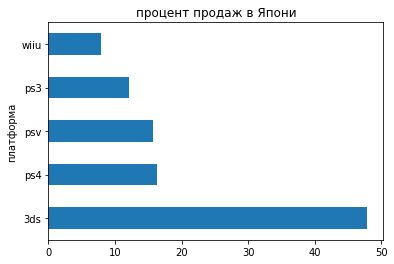

In [54]:
jp_users_platform['%'].sort_values(ascending=False).plot.barh(xlabel='платформа',ylabel='процент продаж')
plt.title('процент продаж в Япони')
plt.show()

Лидирующие место на японском рынке занимает "3DS", далее идет "РС4" и "PSV". Остальные платформы представленны так же незначительно.

In [55]:
# доп. таблица с продажами по платформам в Северной Америке. топ 5 популярных платформ, остальные сгруппированы  
na_users_plt =  data_filter.pivot_table(index='platform',
                                  values='na_sales',
                                  aggfunc='sum').sort_values(by='na_sales', ascending=False)
other = pd.DataFrame({'platform':'other',
                     'na_sales': na_users_plt['na_sales'].sum() - na_users_plt['na_sales'].head().sum()},
                    index=[0]).set_index('platform')
na_user_plt_final = pd.concat([na_users_plt.head(),other], axis=0, ignore_index=False)
na_user_plt_final

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05
other,31.19


In [56]:
# доп. таблица с продажами по платформам в Европе. топ 5 популярных платформ, остальные сгруппированы  
eu_users_plt =  data_filter.pivot_table(index='platform',
                                  values='eu_sales',
                                  aggfunc='sum').sort_values(by='eu_sales', ascending=False)
other = pd.DataFrame({'platform':'other',
                     'eu_sales': eu_users_plt['eu_sales'].sum() - eu_users_plt['eu_sales'].head().sum()},
                    index=[0]).set_index('platform')
eu_user_plt_final = pd.concat([eu_users_plt.head(),other], axis=0, ignore_index=False)
eu_user_plt_final

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12
other,34.76


In [57]:
# доп. таблица с продажами по платформам в Японии. топ 5 популярных платформ, остальные сгруппированы  
jp_users_plt =  data_filter.pivot_table(index='platform',
                                  values='jp_sales',
                                  aggfunc='sum').sort_values(by='jp_sales', ascending=False)
other = pd.DataFrame({'platform':'other',
                     'jp_sales': jp_users_plt['jp_sales'].sum() - jp_users_plt['jp_sales'].head().sum()},
                    index=[0]).set_index('platform')
jp_user_plt_final = pd.concat([jp_users_plt.head(),other], axis=0, ignore_index=False)
jp_user_plt_final

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31
other,0.76


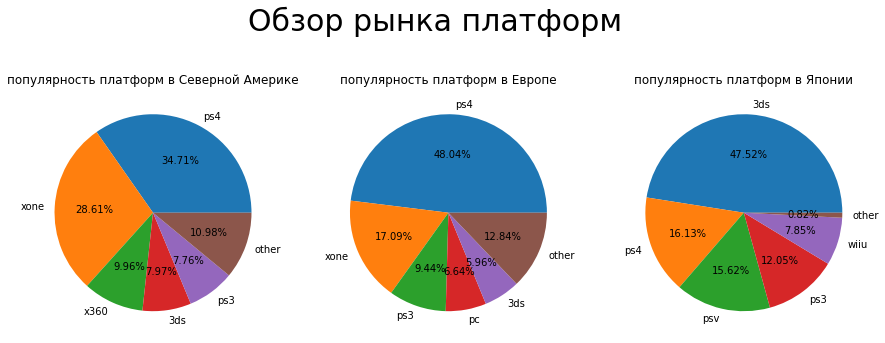

In [59]:
fig, axes = plt.subplots(1,3,figsize=(15,6))
plt.suptitle('Обзор рынка платформ').set_size(30)
na_user_plt_final.plot(ax=axes[0],kind='pie',y='na_sales',
                       autopct='%1.2f%%',title='популярность платформ в Северной Америке',
                       legend=False,ylabel='')
eu_user_plt_final.plot(ax=axes[1],kind='pie',y='eu_sales',
                       autopct='%1.2f%%',title='популярность платформ в Европе',
                       legend=False,ylabel='')
jp_user_plt_final.plot(ax=axes[2],kind='pie',y='jp_sales',
                       autopct='%1.2f%%',title='популярность платформ в Японии',
                       legend=False,ylabel='')

plt.show()

### Самые популярные жанры в Северной Америке, Европе и Японии.

In [60]:
# самые популярные жанры в Северной Америке
na_users_genre = data_filter.pivot_table(index='genre',
                                  values='na_sales',
                                  aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na_users_genre['%'] = (na_users_genre['na_sales'] / na_users_genre['na_sales'].sum() * 100).round(2)
na_users_genre

,na_sales,%
genre,,
shooter,79.02,32.10
action,72.53,29.46
sports,46.13,18.74
role-playing,33.47,13.59
misc,15.05,6.11


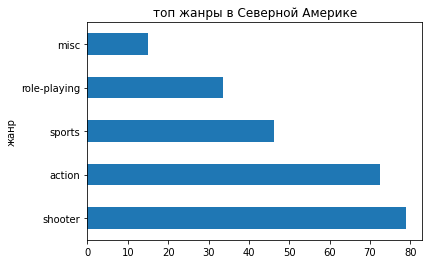

In [61]:
na_users_genre['na_sales'].sort_values(ascending=False).plot.barh(xlabel='жанр',ylabel='продажи')
plt.title('топ жанры в Северной Америке')
plt.show()

Видим, что в Северной Америке самым популярным является жанр "Shooter", следом идет "Action" далее "Sports", "Role-Playing" и "Misc". 

In [62]:
# самые популярные жанры в Европе
eu_users_genre = data_filter.pivot_table(index='genre',
                                  values='eu_sales',
                                  aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_users_genre['%'] = (eu_users_genre['eu_sales'] / eu_users_genre['eu_sales'].sum() * 100).round(2)
eu_users_genre

,eu_sales,%
genre,,
action,74.68,32.72
shooter,65.52,28.71
sports,45.73,20.04
role-playing,28.17,12.34
racing,14.13,6.19


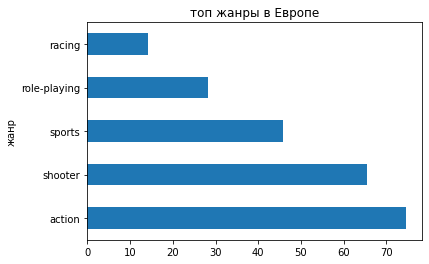

In [63]:
eu_users_genre['eu_sales'].sort_values(ascending=False).plot.barh(xlabel='жанр',ylabel='продажи')
plt.title('топ жанры в Европе')
plt.show()

В Европе на первом месте "Action", следом идет "Shooter" далее "Sports", "Role-Playing" и "Racing".

In [64]:
# самые популярные жанры в Японии
jp_users_genre = data_filter.pivot_table(index='genre',
                                  values='jp_sales',
                                  aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_users_genre['%'] = (jp_users_genre['jp_sales'] / jp_users_genre['jp_sales'].sum() * 100).round(2)
jp_users_genre

,jp_sales,%
genre,,
role-playing,31.16,40.16
action,29.58,38.12
fighting,6.37,8.21
misc,5.61,7.23
shooter,4.87,6.28


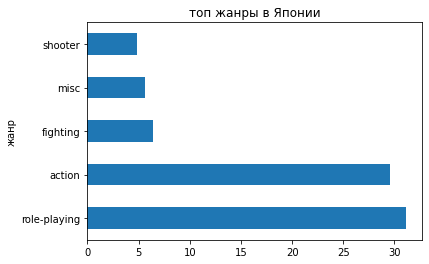

In [65]:
jp_users_genre['jp_sales'].sort_values(ascending=False).plot.barh(xlabel='жанр',ylabel='продажи')
plt.title('топ жанры в Японии')
plt.show()

В Японии с большим отрывом лидирует жанры "Role-Playing" и "Action", менее популярны "Fighting", "Misc", "Shooter".

In [66]:
# доп. таблица с продажами по жанрам в Северной Америке. топ 5 популярных жанров, остальные сгруппированы  
na_users_gnr =  data_filter.pivot_table(index='genre',
                                  values='na_sales',
                                  aggfunc='sum').sort_values(by='na_sales', ascending=False)
other = pd.DataFrame({'genre':'other',
                     'na_sales': na_users_gnr['na_sales'].sum() - na_users_gnr['na_sales'].head().sum()},
                    index=[0]).set_index('genre')
na_user_gnr_final = pd.concat([na_users_gnr.head(),other], axis=0, ignore_index=False)
na_user_gnr_final

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05
other,37.86


In [67]:
# доп. таблица с продажами по жанрам в Европе. топ 5 популярных жанров, остальные сгруппированы  
eu_users_gnr =  data_filter.pivot_table(index='genre',
                                  values='eu_sales',
                                  aggfunc='sum').sort_values(by='eu_sales', ascending=False)
other = pd.DataFrame({'genre':'other',
                     'eu_sales': eu_users_gnr['eu_sales'].sum() - eu_users_gnr['eu_sales'].head().sum()},
                    index=[0]).set_index('genre')
eu_user_gnr_final = pd.concat([eu_users_gnr.head(),other], axis=0, ignore_index=False)
eu_user_gnr_final

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13
other,42.45


In [68]:
# доп. таблица с продажами по жанрам в Японии. топ 5 популярных жанров, остальные сгруппированы  
jp_users_gnr =  data_filter.pivot_table(index='genre',
                                  values='jp_sales',
                                  aggfunc='sum').sort_values(by='jp_sales', ascending=False)
other = pd.DataFrame({'genre':'other',
                     'jp_sales': jp_users_gnr['jp_sales'].sum() - jp_users_gnr['jp_sales'].head().sum()},
                    index=[0]).set_index('genre')
jp_user_gnr_final = pd.concat([jp_users_gnr.head(),other], axis=0, ignore_index=False)
jp_user_gnr_final

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87
other,15.50


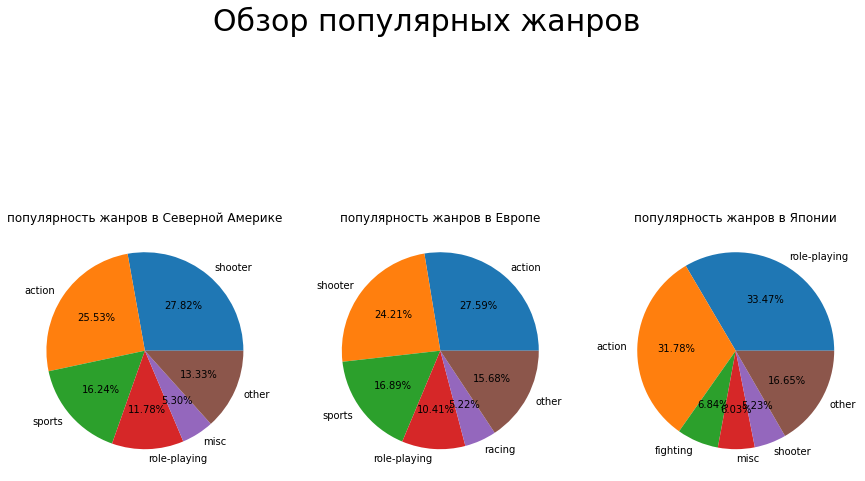

In [69]:
fig, axes = plt.subplots(1,3,figsize=(15,10))
plt.suptitle('Обзор популярных жанров').set_size(30)
na_user_gnr_final.plot(ax=axes[0],kind='pie',y='na_sales',
                       autopct='%1.2f%%',title='популярность жанров в Северной Америке',
                       legend=False,ylabel='')
eu_user_gnr_final.plot(ax=axes[1],kind='pie',y='eu_sales',
                       autopct='%1.2f%%',title='популярность жанров в Европе',
                       legend=False,ylabel='')
jp_user_gnr_final.plot(ax=axes[2],kind='pie',y='jp_sales',
                       autopct='%1.2f%%',title='популярность жанров в Японии',
                       legend=False,ylabel='')
plt.show()

### Самые популярные возростные рейтинги в Северной Америке, Европе и Японии.

In [70]:
# самые популярные рейтинги в Северной Америке
na_users_rating = data_filter.pivot_table(index='rating',
                                  values='na_sales',
                                  aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na_users_rating['%'] = (na_users_rating['na_sales'] / na_users_rating['na_sales'].sum() * 100).round(2)
na_users_rating

,na_sales,%
rating,,
m,96.42,33.94
unknown,64.72,22.78
e,50.74,17.86
t,38.95,13.71
e10+,33.23,11.70


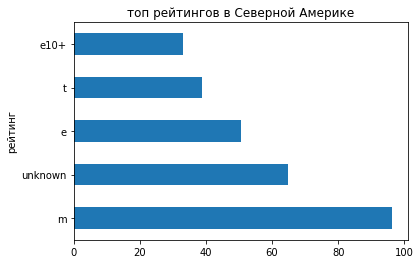

In [71]:
na_users_rating['na_sales'].sort_values(ascending=False).plot.barh(xlabel='рейтинг',ylabel='продажи')
plt.title('топ рейтингов в Северной Америке')
plt.show()

В Северной Америке самым популярным является рейтинг "М", далее идет группа "unknown" ее мы не учитываем , следом идут рейтинги "Е", "Т", "Е10+".

In [72]:
# самые популярные рейтинги в Европе
eu_users_rating = data_filter.pivot_table(index='rating',
                                  values='eu_sales',
                                  aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_users_rating['%'] = (eu_users_rating['eu_sales'] / eu_users_rating['eu_sales'].sum() * 100).round(2)
eu_users_rating

,eu_sales,%
rating,,
m,93.44,34.52
unknown,58.95,21.78
e,58.06,21.45
t,34.07,12.59
e10+,26.16,9.66


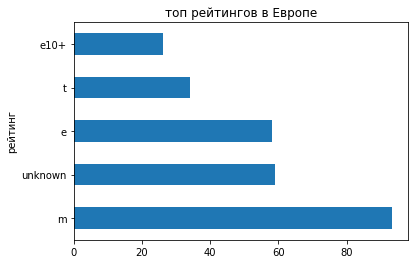

In [73]:
eu_users_rating['eu_sales'].sort_values(ascending=False).plot.barh(xlabel='рейтинг',ylabel='продажи')
plt.title('топ рейтингов в Европе')
plt.show()

В Европе ситуация схожа с Северной Америкой.  Самым популярным является рейтинг "М", далее идет группа "unknown" ее мы не учитываем , следом идут рейтинги "Е", "Т", "Е10+". Различие только в распредилении. 

In [74]:
# самые популярные рейтинги в Японии
jp_users_rating = data_filter.pivot_table(index='rating',
                                  values='jp_sales',
                                  aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_users_rating['%'] = (jp_users_rating['jp_sales'] / jp_users_rating['jp_sales'].sum() * 100).round(2)
jp_users_rating

,jp_sales,%
rating,,
unknown,56.90,61.12
t,14.78,15.88
e,8.94,9.60
m,8.01,8.60
e10+,4.46,4.79


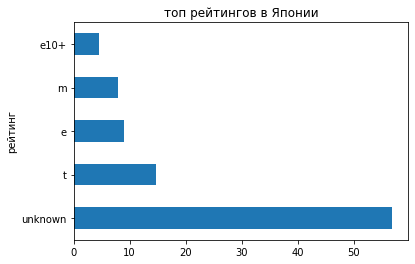

In [75]:
jp_users_rating['jp_sales'].sort_values(ascending=False).plot.barh(xlabel='рейтинг',ylabel='продажи')
plt.title('топ рейтингов в Японии')
plt.show()

Пропуски в рейтинге сильно испортили данные для Японии. Первое место занимает рейтинг "Т", далее "Е", "М" и "Е10+".

### Портрет пользователя каждого региона, вывод.
1. Самые популярные платформы :<br>
1) В Северной Америке на первом месте "РС4", далее идет "Xbox One".<br>
2) В Европе с большим отрывом лидирует "РС4" далее идет "Xbox One".<br>
3) Лидирующие место на японском рынке занимает "3DS", далее идет "РС4" и "PSV".<br>
2. Самые популярные жанры :<br>
1) В Северной Америке самым популярным является жанр "Shooter", следом идет "Action" далее "Sports", "Role-Playing" и "Misc".<br>
2) В Европе на первом месте "Action", следом идет "Shooter" далее "Sports", "Role-Playing" и "Racing".<br>
3) В Японии с большим отрывом лидирует жанр "Action", следом "Role-Playing", менее популярны "Shooter", "Misc", "Adventure".<br>
3. Самые популярные возрастные рейтинги :<br>
1) В Северной Америке самым популярным является рейтинг "М", далее идет группа "unknown" ее мы не учитываем , следом идут рейтинги "Е", "Т", "Е10+".<br>
2) В Европе ситуация схожа с Северной Америкой. Самым популярным является рейтинг "М", далее идет группа "unknown" ее мы не учитываем , следом идут рейтинги "Е", "Т", "Е10+". Различие только в распредилении.<br>
3) Пропуски в рейтинге сильно испортили данные для Японии. Первое место занимает рейтинг "Т", далее "Е", "М" и "Е10+".<br>
<br>
Итого , портрет "типочного пользователя" :<br>
Житель Северной Америки играет на "РС4"/"Xbox One" в игры жанра "Shooter" или "Action" с рейтингом "М".<br>
Портрет Европейца схож с жителем Северной Америки.<br>
Японец играет на "3DS" в игры жанра "Action" с рейтингом "Т".<br>

## Проверка гипотез.

### Первая - гипотеза средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны. <br>
Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные.

In [76]:
ps4 = data_filter.loc[data_filter['platform'] == 'ps4','user_score'].dropna()
xbox = data_filter.loc[data_filter['platform'] == 'xone','user_score'].dropna()

alpha  = 0.05
results = st.ttest_ind(ps4, xbox)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.09668975421672833
Не получилось отвергнуть нулевую гипотезу


В ходе теста было выявленно, что мы не можем отвергнуть нулевую гипотезу. Видимо средние пользовательские рейтинги платформ Xbox One и PC действительно одинаковые. р-значение показывает : вероятность случайно получить такое или большее различие равна почти 9%, достаточно низкое. 

### Вторая гипотеза - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза - cредние пользовательские рейтинги жанров Action и Sports одинаковые. <br>
Альтернативная гипотеза - cредние пользовательские рейтинги жанров Action и Sports разные.

In [77]:
action_score = data_filter.loc[data_filter['genre'] == 'action','user_score'].dropna()
sports_score = data_filter.loc[data_filter['genre'] == 'sports','user_score'].dropna()

alpha  = 0.05
results = st.ttest_ind(action_score, sports_score)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Тест показал, что нулевую гипотезу нужно отвергнуть. Стало быть cредние пользовательские рейтинги жанров Action и Sports разные. р-значение показывает : вероятность случайно получить такое или большее различие крайне мала.

# Общий вывод.
В ходе работы были выполнены следующие шаги :<br>
1. Первичное знакомство с данными.<br>
2. Предобработка данных :<br>
1) Названия столбцов были приведены к нижнему регистру, а также название игр и платформ, жанр и рейтинг.<br>
2) Были удалены строки с пропусками в названии игры, год выпуска и жанр.<br>
3) Были удалены неявные дубликаты в столбцах с названием игр и платформ, жанр и рейтинг.<br>
4) Заполнили пропуски в рейтиге значением 'unknown'.<br>
5) В столбце с оценками пользователей значения 'tbd' были заменены на 'NaN'.<br>
6) Столбцы с оценкоами пользователей и годом выпуска игры были приведены к числовому формату.<br>
7) Был добавлен столбец с суммарной выручкой по миру для каждой игры.<br>
8) Пропуски с оценками критиков и пользователей оставим как есть , будет неправильно заполнять их агрегированными значениями.
<br>
<br>
Причинами появления пропусков в данных могут быть: неверный ввод данных, сокрытие информации, повреждение файла данных при сохранении, технические проблемы.<br>
<br>
3. Исследовательский анализ :<br>
1) С 2001г выпуск игр значительно вырос.После 2011г начался резкий спад.<br>
2) Платфрмы "PS2","X360","PS3","Wii","DS","PS4","GBA" являются лидерами по суммарным продажам по годам.<br>
3) Можно сказать , что новые платформы появляются примерно каждые 5-10 лет , примерно столько же они остаются актуальными.<br>
4) Для исследования взяли данные за 2014, 2015 и 2016 года т.к. нам нужно сделать прогноз на 2017г. Данные за этот период будут более актуальными. Так же самыми перспективными являются платформы РС4 и Xbox One, РС и 3DS так же остаются актуальными.<br>
5) В целом, зависимость между оценками критиков\пользователей и продажами для РС4 и другими платформами похожа. Не ярко выражена.<br>
6) Топ 5 жанров : <br>

1) Shooter<br>
2) Sports<br>
3) Platform<br>
4) Fighting<br>
5) Role-Playing<br>

5 самых не популярных :<br>

1) Adventure<br>
2) Puzzle<br>
3) Strategy<br>
4) Racing<br>
5) Misc<br>
<br>

Диаграмме размаха показала, что жанр "Shooter" имеет самае высокие выбросы. Это говорит о большом кол-ве игр, которые имели очень высокие продажи. Так же у этого жанра самые высокие медиальные значения, из этого следаует , что на дестанции этот жанр имеет более высокие продажи. Стоит выделить жанры "Sports" и "Platform". Оба жанра имеют хорошие медиальные значения и выбросы, но в жанре "Sports" их больше. Так же обращает на себя внимание жанр "Action", его медиальные значения не так высоки, но очень много выбросов.
<br>
<br>
4. Портрет пользователя каждого региона.<br>
1. Самые популярные платформы :<br>
1) В Северной Америке на первом месте "РС4", далее идет "Xbox One".<br>
2) В Европе с большим отрывом лидирует "РС4" далее идет "Xbox One".<br>
3) Лидирующие место на японском рынке занимает "3DS", далее идет "РС4" и "PSV".<br>
2. Самые популярные жанры :<br>
1) В Северной Америке самым популярным является жанр "Shooter", следом идет "Action" далее "Sports", "Role-Playing" и "Misc".<br>
2) В Европе на первом месте "Action", следом идет "Shooter" далее "Sports", "Role-Playing" и "Racing".<br>
3) В Японии с большим отрывом лидирует жанр "Action", следом "Role-Playing", менее популярны "Shooter", "Misc", "Adventure".<br>
3. Самые популярные возрастные рейтинги :<br>
1) В Северной Америке самым популярным является рейтинг "М", далее идет группа "unknown" ее мы не учитываем , следом идут рейтинги "Е", "Т", "Е10+".<br>
2) В Европе ситуация схожа с Северной Америкой. Самым популярным является рейтинг "М", далее идет группа "unknown" ее мы не учитываем , следом идут рейтинги "Е", "Т", "Е10+". Различие только в распредилении.<br>
3) Пропуски в рейтинге сильно испортили данные для Японии. Первое место занимает рейтинг "Т", далее "Е", "М" и "Е10+".<br>
<br>
Итого , портрет "типочного пользователя" :<br>
Житель Северной Америки играет на "РС4"/"Xbox One" в игры жанра "Shooter" или "Action" с рейтингом "М".<br>
Портрет Европейца схож с жителем Северной Америки.<br>
Японец играет на "3DS" в игры жанра "Action" с рейтингом "Т".<br>
<br>

<br>
5 Проверка гипотез итог :<br>
1) Средние пользовательские рейтинги платформ Xbox One и PC действительно одинаковые.<br>
2) Средние пользовательские рейтинги жанров Action и Sports разные.<br>
<br>
Общий вывод : самыми актуальными  две платформы - "РС4" и "Xbox One", так же актуальными остаются "РС" и "3DS". Среди жанров - "Shooter", "Action" и "Sports".<br>
Рекламную компанию стоит проводить с большим упором на "РС4" и "Xbox One".